In [1]:
import numpy as np
import random
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_file(directory):
    list_dir = os.listdir(directory)
    list_dir = sorted(list_dir)
    
    train_acc, train_loss, val_acc, val_loss = [],[],[],[]
    with open(directory+'/'+list_dir[0],'r') as f:
        for line in f:
            train_acc.append(float(line.rstrip('\n')))
    with open(directory+'/'+list_dir[1],'r') as f:
        for line in f:
            train_loss.append(float(line.rstrip('\n')))  
    with open(directory+'/'+list_dir[2],'r') as f:
        for line in f:
            val_acc.append(float(line.rstrip('\n')))  
    with open(directory+'/'+list_dir[3],'r') as f:
        for line in f:
            val_loss.append(float(line.rstrip('\n')))  

    return train_acc,train_loss,val_acc,val_loss

In [3]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    return m, m-h, m+h

def return_highest(input_list,interval):
    tmp_mean, tmp_diff, index = 0, 0, 0
    for i in range(len(input_list)-interval):
        mean, high, low = mean_confidence_interval(input_list[i:interval+i])
        if mean > tmp_mean:
            tmp_mean = mean
            tmp_diff = high-mean
            index = i

    return tmp_mean,-tmp_diff, index, interval

In [4]:
_5151_training_acc, _5151_training_loss, _5151_val_acc, _5151_val_loss = read_file('5151/')
_5155_training_acc, _5155_training_loss, _5155_val_acc, _5155_val_loss = read_file('5155/')
_5551_training_acc, _5551_training_loss, _5551_val_acc, _5551_val_loss = read_file('5551/')
_5555_training_acc, _5555_training_loss, _5555_val_acc, _5555_val_loss = read_file('5555/')

_51201_training_acc, _51201_training_loss, _51201_val_acc, _51201_val_loss = read_file('51201/')
_51205_training_acc, _51205_training_loss, _51205_val_acc, _51205_val_loss = read_file('51205/')
_55201_training_acc, _55201_training_loss, _55201_val_acc, _55201_val_loss = read_file('55201/')
_55205_training_acc, _55205_training_loss, _55205_val_acc, _55205_val_loss = read_file('55205/')

_20151_training_acc, _20151_training_loss, _20151_val_acc, _20151_val_loss = read_file('20151/')
_20155_training_acc, _20155_training_loss, _20155_val_acc, _20155_val_loss = read_file('20155/')
_20551_training_acc, _20551_training_loss, _20551_val_acc, _20551_val_loss = read_file('20551/')
_20555_training_acc, _20555_training_loss, _20555_val_acc, _20555_val_loss = read_file('20555/')

_201201_training_acc, _201201_training_loss, _201201_val_acc, _201201_val_loss = read_file('201201/')
_201205_training_acc, _201205_training_loss, _201205_val_acc, _201205_val_loss = read_file('201205/')
_205201_training_acc, _205201_training_loss, _205201_val_acc, _205201_val_loss = read_file('205201/')
_205205_training_acc, _205205_training_loss, _205205_val_acc, _205205_val_loss = read_file('205205/')

In [5]:
_60151_training_acc, _60151_training_loss, _60151_val_acc, _60151_val_loss = read_file('60151/')
_60155_training_acc, _60155_training_loss, _60155_val_acc, _60155_val_loss = read_file('60155/')
_60551_training_acc, _60551_training_loss, _60551_val_acc, _60551_val_loss = read_file('60551/')
_60555_training_acc, _60555_training_loss, _60555_val_acc, _60555_val_loss = read_file('60555/')

_601201_training_acc, _601201_training_loss, _601201_val_acc, _601201_val_loss = read_file('601201/')
#_601205_training_acc, _601205_training_loss, _601205_val_acc, _601205_val_loss = read_file('601205/')
_605201_training_acc, _605201_training_loss, _605201_val_acc, _605201_val_loss = read_file('605201/')
#_605205_training_acc, _605205_training_loss, _605205_val_acc, _605205_val_loss = read_file('605205/')

In [5]:
def draw_figure(training_acc,training_loss,val_acc,val_loss,le_name=('5w_1s','20w_1s','60w_1s'),save_op=False,alpha=1):

    color_selection = ['b','r','k','m','c','g']
    #len_train = int(len(training_acc[0])*alpha)
    len_test = int(len(val_acc[0])*alpha)
    val = np.arange(0,len_test*50,50)
#     training = np.arange(0, len_train, 1)
#     val = np.arange(0, len_train, int(len_train/len_test))

#     fig = plt.figure(figsize=(25,16))
#     fig.suptitle('Training and Validation results on Omniglot dataset', fontsize=24)

#     plt.subplot(2, 2, 1)
#     for i in range(len(le_name)):
#         plt.plot(training, training_loss[i][0:len_train],color_selection[i])
#     plt.xlabel('iteration', fontsize=18)
#     plt.ylabel('train_loss', fontsize=18)
#     plt.gca().legend(le_name, fontsize=18)

#     plt.subplot(2, 2, 2)
#     for i in range(len(le_name)):
#         plt.plot(val, val_loss[i][0:len_test],color_selection[i])
#     plt.xlabel('iteration', fontsize=18)
#     plt.ylabel('val_loss', fontsize=18)
#     plt.gca().legend(le_name, fontsize=18)

#     plt.subplot(2, 2, 3)
#     for i in range(len(le_name)):
#         plt.plot(training, training_acc[i][0:len_train],color_selection[i])
#     plt.xlabel('iteration', fontsize=18)
#     plt.ylabel('train_acc', fontsize=18)
#     plt.gca().legend(le_name, fontsize=18)

    plt.subplot(1, 1, 1)
    #plt.xticks(fontsize=20)
    #plt.yticks(fontsize=20)
    for i in range(len(le_name)):
        plt.plot(val, val_acc[i][0:len_test],color_selection[i])
    plt.xlabel('iteration', fontsize=18)
    plt.ylabel('val_acc', fontsize=18)
    plt.gca().legend(le_name, fontsize=18)
    #,prop={'size': 24}
    if save_op:
        fig.savefig('image.jpg')
    plt.show()

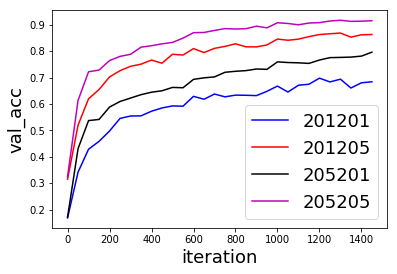

In [10]:
#training_loss = [_5151_training_loss,_20151_training_loss,_60151_training_loss,_5551_training_loss,_20551_training_loss,_60551_training_loss]
#training_acc = [_5151_training_acc,_20151_training_acc,_60151_training_acc,_5551_training_acc,_20551_training_acc,_60551_training_acc]
#val_loss = [_5151_val_loss,_20151_val_loss,_60151_val_loss,_5551_val_loss,_20551_val_loss,_60551_val_loss]
training_acc=[]
training_loss=[]
val_loss=[]
val_acc = [_51201_val_acc,_51205_val_acc,_55201_val_acc,_55205_val_acc]
le_name = ('201201','201205','205201','205205')
draw_figure(training_acc,training_loss,val_acc,val_loss,le_name,save_op=False,alpha=0.3)

In [6]:
#regular
# regular_acc = [_5151_val_acc,_5155_val_acc,_5551_val_acc,_5555_val_acc,
#                _20151_val_acc,_20155_val_acc,_20551_val_acc,_20555_val_acc,
#                _51201_val_acc,_51205_val_acc,_55201_val_acc,_55205_val_acc,
#                _201201_val_acc,_201205_val_acc,_205201_val_acc,_205205_val_acc]
#_60151_val_acc,_60155_val_acc,_60551_val_acc,_60555_val_acc,
#_601201_val_acc,_601205_val_acc,_605201_val_acc,_605205_val_acc
regular_acc = [_60151_val_acc,_60155_val_acc,_60551_val_acc,_60555_val_acc,_601201_val_acc,_605201_val_acc]
regular_name = ('5151','5155','5551','5555','20151','20155','20551','20555',
               '51201','51205','55201','55205','201201','201205','205201','205205')
for i in range(len(regular_acc)):
    print(str(regular_name[i]),': ', max(regular_acc[i]))

5151 :  0.9928000038862228
5155 :  0.9992000007629395
5551 :  0.9908000040054321
5555 :  0.998933334350586
20151 :  0.9594666701555252
20155 :  0.9468000000715255


In [13]:
#i is length of list being calculated
for i in range(2,50,2):
    mean,diff,index,interval = return_highest(_20151_val_acc,i)
    print('from {} to {}'.format(index,index+interval),mean,diff)

from 76 to 78 0.9858666720986367 0.0067766322766430465
from 75 to 79 0.9845000061392783 0.0027737146462084583
from 72 to 78 0.984288894633452 0.0015964097591472104
from 91 to 99 0.9835333394259214 0.0022309811303407034
from 88 to 98 0.9830400060415269 0.001956174656099874
from 87 to 99 0.9831222280859948 0.0016500182002276986
from 72 to 86 0.9826571485825948 0.0012985804603001805
from 82 to 98 0.9824000057578087 0.0017725095233058763
from 81 to 99 0.9823185242878066 0.0015583382136259427
from 75 to 95 0.9823800056278704 0.0014129046212535412
from 73 to 95 0.9824848541617393 0.001293708968361451
from 74 to 98 0.9824500058591367 0.0012926294264999916
from 72 to 98 0.9825641083946596 0.0012011660947224279
from 71 to 99 0.9823666724775517 0.0011627039135215789
from 69 to 99 0.9819422280192375 0.0012527767462631179
from 67 to 99 0.9818375057727099 0.0012543754341444169
from 65 to 99 0.9817607900149682 0.0011818103260623491
from 62 to 98 0.9815592649910183 0.0011620344889446965
from 61 to 99